In [3]:
import numpy as np
np.random.seed(0)

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

# To set the color used to display monochrome images.
plt.rcParams['image.cmap'] = 'Blues'

In [4]:
data_gen = ImageDataGenerator(rescale=1.0/255)

In [5]:
data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' # or wherever you put them...
img_size = 128
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

val_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [6]:
Xbatch, Ybatch = train_generator.next()

In [7]:
X_val, Y_val = val_generator.next()

In [8]:
Xbatch.shape

(32, 128, 128, 3)

In [9]:
Ybatch[4]

0.0

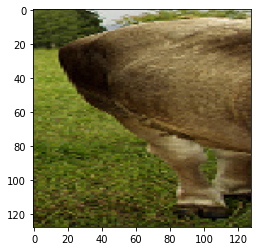

In [10]:
plt.imshow(Xbatch[4]);

In [11]:
#create model
def make_convnet(img_size, channel):
    #create model
    model = Sequential()

    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_size,img_size,channel))) # layer 1
    model.add(Conv2D(32, kernel_size=3, activation='relu')) # layer 2
    model.add(Flatten())
    model.add(Dense(2, activation='sigmoid'))
    model.add(Flatten())

    ## Binary crossentropy loss function and Adam optimizer 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
    return model

def train_model(model, epo):
    model.fit(Xbatch, Ybatch, validation_data=(X_val, Y_val), epochs=epo)
    return model

def model_info(model):
    return model.summary()

In [12]:
mm = make_convnet(img_size, 3)
trained_model = train_model(mm, 10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6864 - accuracy: 0.9688 - val_loss: 4.5497e-06 - val_accuracy: 0.9688
Epoch 2/10
1/1 [==============================] - 1s 926ms/step - loss: 2.6897e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 3/10
1/1 [==============================] - 1s 912ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_

In [13]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range= 0.85,
        #zoom_range=[1,0.7],
        horizontal_flip=True,
        #height_shift_range=0.01
        )

test_datagen = ImageDataGenerator(rescale=1./255)


## Only do augmentation on the traing data...
train_generator = train_datagen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='binary' ,
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)


Found 1600 images belonging to 2 classes.


## See some manipulated picture

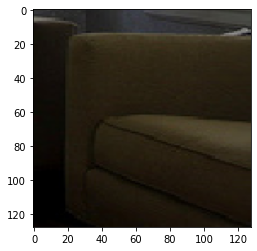

In [14]:
Xbatch, Ybatch = train_generator.next()
X_val, Y_val = val_generator.next()
Xbatch.shape
Ybatch[10]
plt.imshow(Xbatch[29]);

In [15]:
mm = make_convnet(img_size, 3)
trained_model = train_model(mm, 10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7316 - accuracy: 0.3750 - val_loss: 5.6532e-07 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 5.3578 - accuracy: 0.6250 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 3.2411 - accuracy: 0.6250 - val_loss: 5.1653 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 5.3560 - accuracy: 0.6250 - val_loss: 2.4614 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 2.7848 - accuracy: 0.6250 - val_loss: 0.4457 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.5154 - accuracy: 0.6250 - val_loss: 1.1444 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.7190 - accuracy: 0.3750 - val_loss: 0.5691 - val_accuracy: 0.0000e+00
Epoch 8/10
1/1 [=============

In [16]:
# If we initialize the random number generator before loading Keras, we'll get the same
# result each time we run the notebook.
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'a5_images' # or wherever you put them...
img_size = 224
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [18]:
Xbatch, Ybatch = train_generator.next()
X_val, Y_val = val_generator.next()
Xbatch.shape

(32, 224, 224, 3)

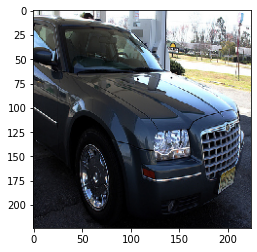

In [19]:
picNum = 7
plt.imshow(Xbatch[picNum]);

In [20]:
# Adding the fouth dimension, for number of images
x = np.expand_dims(Xbatch[picNum], axis=0)
x.shape

(1, 224, 224, 3)

In [21]:
x = x *255
x.shape

(1, 224, 224, 3)

In [22]:
features = model.predict(x)
p = decode_predictions(features)
p

[[('n03594945', 'jeep', 0.38067618),
  ('n04461696', 'tow_truck', 0.23037753),
  ('n03930630', 'pickup', 0.11662769),
  ('n03670208', 'limousine', 0.08003596),
  ('n03478589', 'half_track', 0.06503813)]]

## Part 3: Using VGG-16 as a feature extractor

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [24]:
img_size = 128
feature_extractor = VGG16(include_top=False, weights='imagenet',  #applications.
                                       input_shape=(img_size, img_size, 3))

In [25]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [26]:
# function: create_vgg16_features
imgdir = 'a5_images' # or wherever you put them...
img_size = 128
batch_size = 32

train_generator = vgg_data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

val_generator = vgg_data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [27]:
CNN_Features_t = feature_extractor.predict(train_generator)

In [28]:
with open('cnn_features_t', 'wb') as f:
        np.save(f, CNN_Features_t)

In [29]:
CNN_Features_v = feature_extractor.predict(val_generator)

In [30]:
with open('cnn_features_v', 'wb') as f:
        np.save(f, CNN_Features_v)

In [31]:
#Read file after that it has been saved --> both for train and val data
with open('cnn_features_t', 'rb') as f:
    cnn_features_t = np.load(f)

In [32]:
#Read file after that it has been saved --> both for train and val data
with open('cnn_features_v', 'rb') as f:
    cnn_features_v = np.load(f)

### Testing the features on a model

## Visualizing the learned features

In [197]:
first_layer_weights = model_vgg16_conv.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [198]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

In [199]:
ki_pos = kernel_image(first_layer_weights, 1, True)
ki_neg = kernel_image(first_layer_weights, 1, False)

In [76]:
ki_pos

array([[[ 0.5797072 ,  0.10320117, -0.        ],
        [ 0.80110663,  0.23401682, -0.        ],
        [ 0.6707614 ,  0.20689425, -0.        ]],

       [[ 0.7333233 ,  0.15348299, -0.        ],
        [ 1.        ,  0.32531253, -0.        ],
        [ 0.79925686,  0.22865967, -0.        ]],

       [[ 0.6393736 ,  0.15659423, -0.        ],
        [ 0.8481153 ,  0.27044255, -0.        ],
        [ 0.68567234,  0.20919381, -0.        ]]], dtype=float32)

In [78]:
ki_neg

array([[[-0.        , -0.        ,  0.9205507 ],
        [-0.        , -0.        ,  0.90817535],
        [-0.        , -0.        ,  0.82276285]],

       [[-0.        , -0.        ,  1.        ],
        [-0.        , -0.        ,  0.946536  ],
        [-0.        , -0.        ,  0.92963   ]],

       [[-0.        , -0.        ,  0.88486856],
        [-0.        , -0.        ,  0.88840836],
        [-0.        , -0.        ,  0.8371405 ]]], dtype=float32)

In [187]:
def plot_layer(layer_data):
    from matplotlib import pyplot
    pyplot.imshow(layer_data, interpolation='nearest')
    pyplot.show()

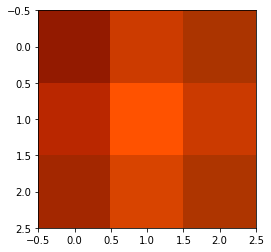

In [188]:
plot_layer(ki_pos)

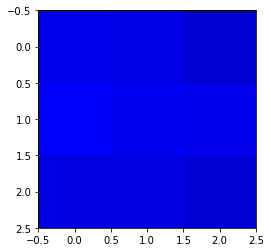

In [189]:
plot_layer(ki_neg)

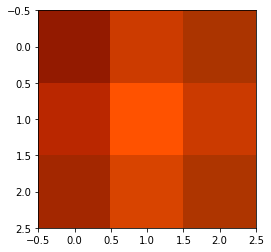

In [177]:
from matplotlib import pyplot
pyplot.imshow(ki_pos, interpolation='nearest')

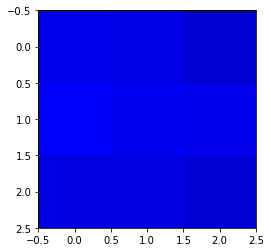

In [174]:
from matplotlib import pyplot
pyplot.imshow(ki_neg, interpolation='nearest')

In [ ]:
# (Z1, cmap=plt.cm.gray, interpolation='nearest',extent=extent)

In [171]:
def plot_model(model, lay):
    if lay == 0:
        lay = 1
    from matplotlib import pyplot
    filters, biases = model.layers[lay].get_weights()

    # getting the min/max from filter to make a normalization
    # filter with the value range [0,1]
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # plotting the first new filters
    n_filters, ix = 6, 1

    for i in range(n_filters):
        f = filters[:, :, :, i]
        for j in range(3):
            ax = pyplot.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(f[:, :, j]) # ADD: cmap='gray' for grey-sacale
            ix += 1
    pyplot.show()

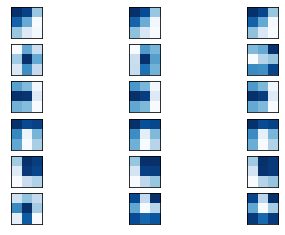

In [172]:
plot_model(model_vgg16_conv, 1)

In [151]:
def plot_modelv2(model, lay, arr):
    if lay == 0:
        lay = 1
    from matplotlib import pyplot
    filters, biases = model.layers[lay].get_weights()

    # getting the min/max from filter to make a normalization
    # filter with the value range [0,1]
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # plotting the first new filters
    n_filters, ix = 6, 1

    for i in range(n_filters):
        f = filters[:, :, :, i]
        for j in range(3):
            ax = pyplot.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(f[:, :, j])
            ix += 1
    pyplot.show()

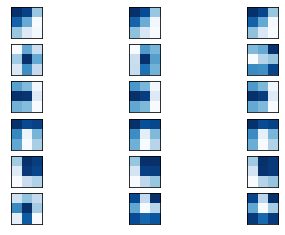

In [152]:
plot_modelv2(model_vgg16_conv, 1, ki_pos)

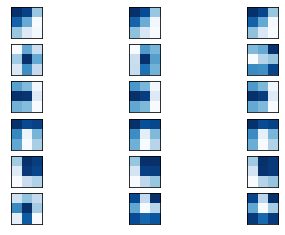

In [153]:
plot_modelv2(model_vgg16_conv, 1, ki_neg)

In [167]:
# first_layer_weights
# ki_pos = kernel_image(first_layer_weights, 1, True)
# ki_neg = kernel_image(first_layer_weights, 1, False)

def plot_modelv3(model, lay, featues):
    if lay == 0:
        lay = 1
    
    from matplotlib import pyplot
    filters, biases = model.layers[lay].get_weights()

    # getting the min/max from filter to make a normalization
    # filter with the value range [0,1]
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # plotting the first new filters
    n_filters, ix = 6, 1

    for i in range(n_filters):
        f = filters[:, :, :, i]
        for j in range(3):
            ax = pyplot.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(f[:, :, j])
            ix += 1
    pyplot.show()

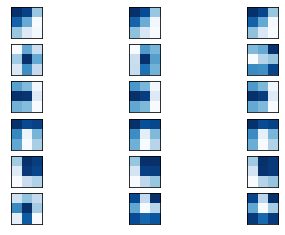

In [168]:
plot_modelv3(model_vgg16_conv, 1, ki_pos)

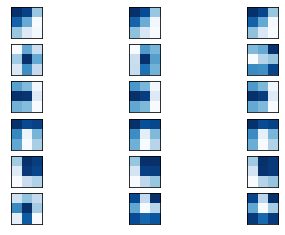

In [50]:
from matplotlib import pyplot
filters, biases = model_vgg16_conv.layers[1].get_weights()

# getting the min/max from filter to make a normalization
# filter with the value range [0,1]
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plotting the first new filters
n_filters, ix = 6, 1

for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:, :, j]) # ADD: cmap='gray' for grey-sacale
        ix += 1
pyplot.show()

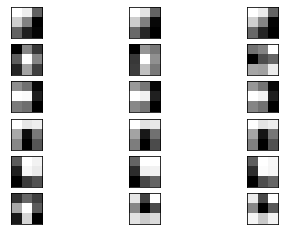

In [41]:
# cannot easily visualize filters lower down
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

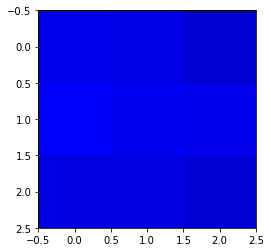

In [127]:
from matplotlib import pyplot as plt
plt.imshow(ki_neg, interpolation='nearest')
plt.show()